In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from itertools import cycle

In [82]:
df = pd.read_table('WEOOct2020all.tsv')

In [83]:
df.head(3)


,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2018,2019,2020,2021,2022,2023,2024,2025,Estimates Start After,Unnamed: 56
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,270.216","1,319.902","1,253.906","1,304.063","1,363.060","1,424.397","1,481.497","1,540.937",2019.0,NaN
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,1.189,3.912,-5.000,4.000,4.524,4.500,4.009,4.012,2019.0,NaN
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,327.690","1,469.596","1,465.922","1,597.738","1,741.832","1,893.023","2,047.665","2,215.013",2019.0,NaN


In [84]:
df['Subject Descriptor'].unique()

array(['Gross domestic product, constant prices',
       'Gross domestic product, current prices',
       'Gross domestic product, deflator',
       'Gross domestic product per capita, constant prices',
       'Gross domestic product per capita, current prices',
       'Output gap in percent of potential GDP',
       'Gross domestic product based on purchasing-power-parity (PPP) share of world total',
       'Implied PPP conversion rate', 'Total investment',
       'Gross national savings', 'Inflation, average consumer prices',
       'Inflation, end of period consumer prices',
       'Six-month London interbank offered rate (LIBOR)',
       'Volume of imports of goods and services',
       'Volume of Imports of goods',
       'Volume of exports of goods and services',
       'Volume of exports of goods', 'Unemployment rate', 'Employment',
       'Population', 'General government revenue',
       'General government total expenditure',
       'General government net lending/borrowing',

In [85]:
per_capita_df = df[df['Subject Descriptor']=="Gross domestic product per capita, constant prices"]
is_USD = df['Units'] == 'Purchasing power parity; 2017 international dollar'
USD_df = per_capita_df[is_USD]
USD_df.shape

<ipython-input-85-a78f75b9c045>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  USD_df = per_capita_df[is_USD]


(195, 57)

In [86]:
export_df = df[df['Subject Descriptor']=="Volume of exports of goods"]
export_df.shape

(195, 57)

In [97]:
USD_df = USD_df[['Country','2019']]

In [99]:
USD_df.head()

,Country,2019
7,Afghanistan,"2,111.253"
52,Albania,"13,944.393"
97,Algeria,"11,252.807"
142,Angola,"7,084.321"
187,Antigua and Barbuda,"21,652.158"


In [100]:
export_df = export_df[['Country','2019']]
export_df.head()

,Country,2019
24,Afghanistan,0.068
69,Albania,-8.454
114,Algeria,-5.125
159,Angola,0.496
204,Antigua and Barbuda,8.555


In [124]:
main_df = pd.merge(USD_df, export_df, on='Country', how='outer')

In [125]:
main_df.shape

(195, 3)

In [138]:
main_df.iloc[:,1:].head()

,GDP,Exp
0,2111.253,0.068
1,13944.393,-8.454
2,11252.807,-5.125
3,7084.321,0.496
4,21652.158,8.555


In [127]:
main_df.rename(columns={'2019_x': 'GDP', '2019_y': 'Exp'}, inplace=True)

In [131]:
main_df['GDP'] = main_df['GDP'].str.replace(',', '')
main_df['GDP'] = pd.to_numeric(main_df['GDP'], errors='coerce')
main_df['Exp'] = pd.to_numeric(main_df['Exp'], errors='coerce')

In [145]:
main_df['GDP'].isnull().sum()

0

In [143]:
main_df = main_df.dropna(subset=['Exp'])

In [134]:
main_df.dtypes

Country     object
GDP        float64
Exp        float64
dtype: object

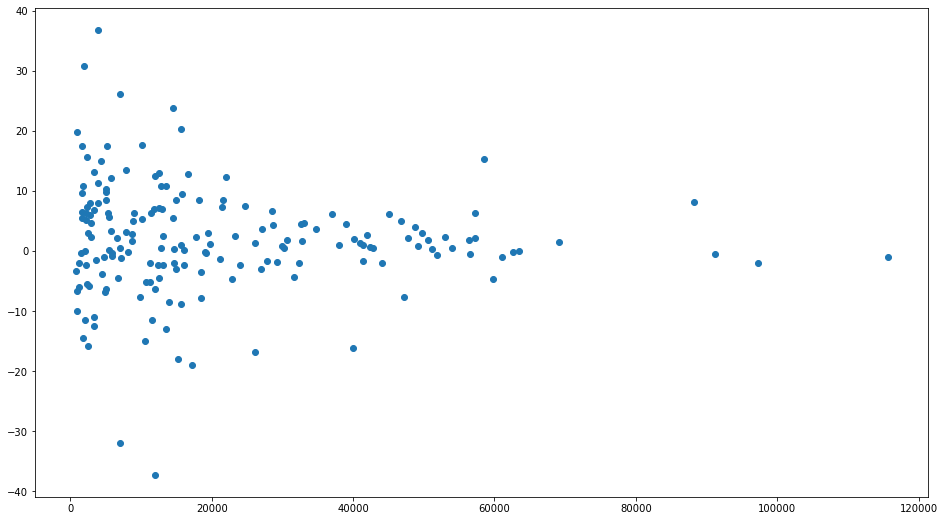

In [136]:
plt.figure(figsize=(16,9))
plt.scatter(main_df['GDP'], main_df['Exp'])

In [137]:
kmeans = KMeans(n_clusters=5)

In [184]:
points = main_df.iloc[:,1:].values

In [154]:
kmeans.fit(points)

KMeans(n_clusters=5)

In [177]:
cluster_centers = kmeans.cluster_centers_

In [178]:
print(cluster_centers)

[[3.37469720e+04 4.84758621e-01]
 [4.08257436e+03 3.34680303e+00]
 [5.39625369e+04 1.60804348e+00]
 [9.81048460e+04 1.17900000e+00]
 [1.52691903e+04 6.43000000e-01]]


In [175]:
labels = kmeans.fit_predict(points)

In [223]:
print(labels)

[1 4 4 1 4 4 4 2 2 4 0 2 1 4 4 2 1 1 4 1 4 4 4 2 4 1 1 1 1 1 2 1 1 4 4 4 1
 1 1 4 1 0 0 0 2 1 4 4 4 4 1 4 1 0 1 1 2 2 4 1 4 2 1 0 4 1 1 1 4 1 1 2 0 2
 1 4 4 3 0 0 4 0 4 0 1 1 0 4 2 1 1 0 4 1 1 4 3 1 1 0 0 1 2 1 4 4 4 4 4 1 1
 1 4 2 0 1 1 1 4 2 0 1 4 0 1 4 4 1 0 0 3 0 0 1 1 2 1 4 0 1 3 0 0 1 4 0 4 0
 4 4 1 4 2 2 2 1 1 4 1 1 0 4 0 4 1 4 2 2 2 4 1 1 4 1 1 1 1]


In [224]:
main_df['clusters'] = pd.Series(labels,index=main_df.index)
main_df

<ipython-input-224-fb486673ea3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['clusters'] = pd.Series(labels,index=main_df.index)


,Country,GDP,Exp,clusters
0,Afghanistan,2111.253,0.068,1
1,Albania,13944.393,-8.454,4
2,Algeria,11252.807,-5.125,4
3,Angola,7084.321,0.496,1
4,Antigua and Barbuda,21652.158,8.555,4
...,...,...,...,...
190,Vietnam,10110.001,5.272,4
191,West Bank and Gaza,5851.869,-0.762,1
192,Yemen,1973.141,30.832,1
193,Zambia,3383.327,-12.488,1


In [ ]:
sorted_df = main_df.sort_values(by='GDP')

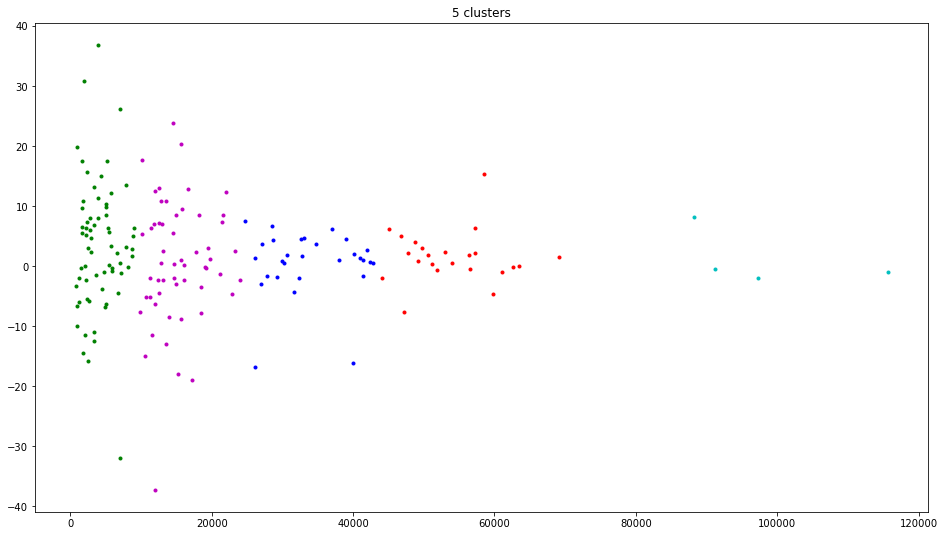

In [222]:
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
plt.figure(figsize=(16, 9))
for k, col in zip(range(5), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(points[my_members, 0], points[my_members, 1], col + '.')
#     for i, txt in enumerate(main_df['Country']):
#         print(points[my_members, 0][i],  i)
#         plt.annotate(txt, (points[my_members, 0][i], points[my_members, 1][i]))
plt.title('5 clusters')
plt.show()